# 캘리포니아 집 값 예측(회귀)

## 데이터 불러오기

In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from plotly.subplots import make_subplots
from plotly.graph_objs import Histogram

In [3]:
df = pd.read_csv("../data/housing.csv") #데이터 프레임워크를 기대

In [4]:
df.shape

(20640, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df.isna()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
0          False     False               False        False           False  \
1          False     False               False        False           False   
2          False     False               False        False           False   
3          False     False               False        False           False   
4          False     False               False        False           False   
...          ...       ...                 ...          ...             ...   
20635      False     False               False        False           False   
20636      False     False               False        False           False   
20637      False     False               False        False           False   
20638      False     False               False        False           False   
20639      False     False               False        False           False   

       population  households  median_income  median_house_value   
0           False       False          False               False  \
1           False       False          False               False   
2           False       False          False               False   
3           False       False          False               False   
4           False       False          False               False   
...           ...         ...            ...                 ...   
20635       False       False          False               False   
20636       False       False          False               False   
20637       False       False          False               False   
20638       False       False          False               False   
20639       False       False          False               False   

       ocean_proximity  
0                False  
1                False  
2                False  
3                False  
4                False  
...                ...  
20635            False  
20636            False  
20637            False  
20638            False  
20639            False  

[20640 rows x 10 columns]

In [8]:
df.describe()#Summary value 확인

longitude      latitude  housing_median_age   total_rooms   
count  20640.000000  20640.000000        20640.000000  20640.000000  \
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income   
count    20433.000000  20640.000000  20640.000000   20640.000000  \
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [9]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## 데이터확인

- 데이터전체를 출력하는 이미지가 필요할때
- 1)3x3 레이아웃 생성
- 2)막대그래프 생성

- longitude
- latitude
- housing_median_age
- total_rooms
- total_bedrooms
- population
- households
- median_income
- median_house_value
- dtype: int64

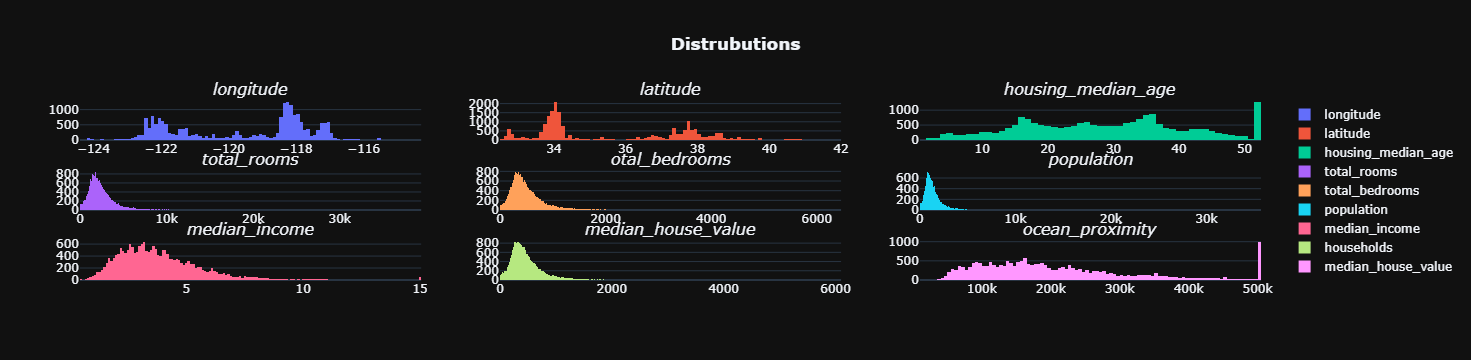

In [5]:
fig = make_subplots(rows=3, cols=3, subplot_titles=("<i>longitude",
                                                    "<i>latitude",
                                                    "<i>housing_median_age",
                                                    "<i>total_rooms",
                                                    "<i>otal_bedrooms",
                                                    "<i>population",
                                                    "<i>median_income",
                                                    "<i>median_house_value",
                                                    "<i>ocean_proximity",
                                                    "<i>median_house_value",))

fig.add_trace(Histogram(x=df["longitude"], name="longitude"), row=1, col=1)
fig.add_trace(Histogram(x=df["latitude"], name="latitude"), row=1, col=2)
fig.add_trace(Histogram(x=df["housing_median_age"], name="housing_median_age"), row=1, col=3)
fig.add_trace(Histogram(x=df["total_rooms"], name="total_rooms"), row=2, col=1)
fig.add_trace(Histogram(x=df["total_bedrooms"], name="total_bedrooms"), row=2, col=2)
fig.add_trace(Histogram(x=df["population"], name="population"), row=2, col=3)
fig.add_trace(Histogram(x=df["median_income"], name="median_income"), row=3, col=1)
fig.add_trace(Histogram(x=df["households"], name="households"), row=3, col=2)
fig.add_trace(Histogram(x=df["median_house_value"], name="median_house_value"), row=3, col=3)


fig.update_layout(template="plotly_dark",title_text="<b>Distrubutions", title_x=0.5)

## 데이터전처리

In [7]:
X=df[["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income"]]
y=df["median_house_value"]

X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=42, shuffle=True, test_size=0.3)

In [40]:
class DataPreprcessing:
    quantitave = ["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income",]
    #생성자
    def __int__(self):
        self.q_25=None
        self.q_75=None
        self.means=None
        self.medians=None    
    #메서드
    def fit(self ,X ,y=None):
        #X를 DF로 가정 하고 중앙값, 평균, 중앙값을 구한다. 
        #X를 데이터 프레임으로 간주
        #q.m.
        self.q_25 = X[DataPreprcessing.quantitave].quantile(q=0.25)
        self.medians = X[DataPreprcessing.quantitave].quantile(q=0.5)        
        self.q_75 = X[DataPreprcessing.quantitave].quantile(q=0.75)
        self.means = X[DataPreprcessing.quantitave].mean()
        
        
       
    
    def transform(self, X, y=None):
        for colum in X[DataPreprcessing.quantitave].colum:            
            #25%~75% 사이 데이터만 추출
            q_3 = self.q_75[colum] 
            q_1 = self.q_25[colum]
            iqr = q_3 - q_1
            upper_bound = q_3+1.5*iqr
            lower_bound = q_1-1.5*iqr
            #pandas의 iloc, loc를 잘구분해서 전처리를 하도록한다.
            #bool 값으로 되어있는 테이블로 필터링한다.
            X.loc[X[colum]>upper_bound, colum]=q_3
            X.loc[X[colum]<upper_bound, colum]=q_1
            
        for colum in X[DataPreprcessing.quantitave].colum:
            #pandas의 cow기능을 숙지한다.
            X[colum].fillna(self.means[colum], inplace=True)
            
        # 후처리
        
    #fit_transform
    #fit
    #transform
    #상태값
   
    pass

## 데이터 분리(머신러닝을 위해서)(사이킷런)

In [16]:
ds = DataPreprcessing()
ds.fit(X)
print(ds.q_25)

longitude             -121.8000
latitude                33.9300
housing_median_age      18.0000
total_rooms           1447.7500
total_bedrooms         296.0000
population             787.0000
households             280.0000
median_income            2.5634
Name: 0.25, dtype: float64


CPU times: total: 0 ns
Wall time: 2.98 ms


CPU times: total: 0 ns
Wall time: 998 µs


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


## 데이터 학습 및 검증